In [25]:
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn plotting 
import seaborn as sns

In [26]:
data = pd.read_csv("ai4i2020.csv")

In [27]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [32]:
data.shape

(10000, 14)

In [33]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")

TypeError: required field "ctx" missing from Subscript

In [ ]:
profile

NameError: name 'profile' is not defined

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000


In [ ]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
num_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

In [ ]:
data['Air temperature [K]'][data['Air temperature [K]'].isna().astype(int)==1]

Series([], Name: Air temperature [K], dtype: float64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

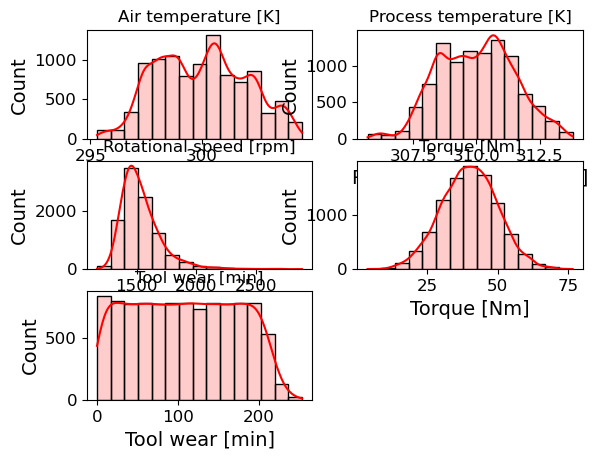

In [ ]:
# Create a figure with a 3x2 grid of subplots
# plt.figure(figsize=(12, 12))

# Loop through the first column (assuming it's numerical) and create histograms
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data, x=col, kde=True, alpha=0.2, color='red', bins=15)
    plt.title(col)  # Add title to each subplot

# # Add a suptitle for the entire figure
# plt.suptitle("Data Distributions", fontsize=15)

# # Adjust spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

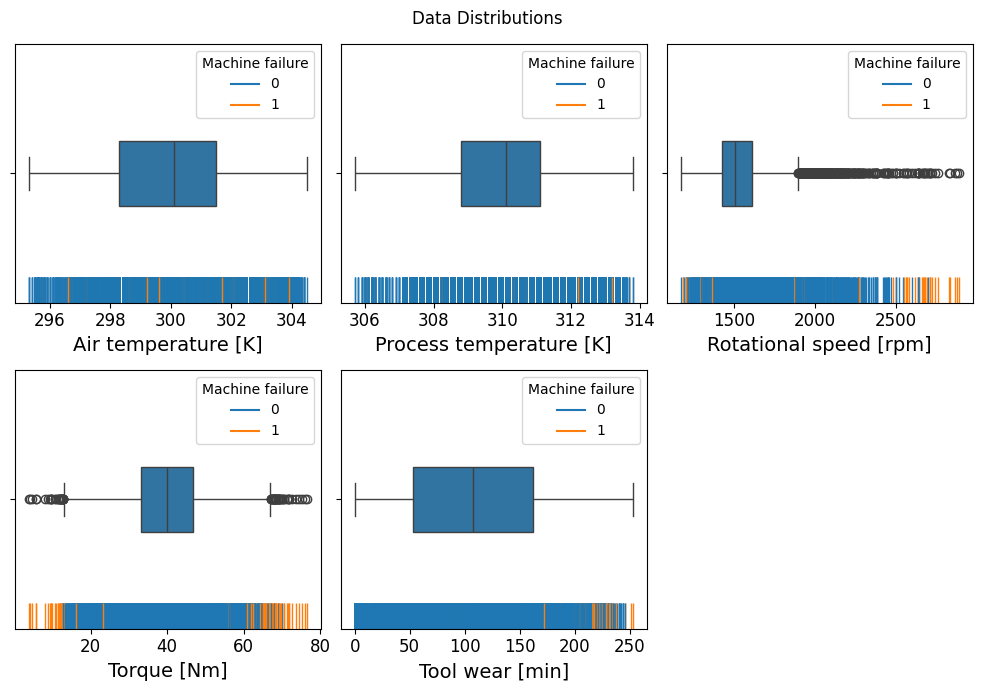

In [ ]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.rugplot(data, x = col, hue = label, height = 0.1)
    sns.boxplot(data, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

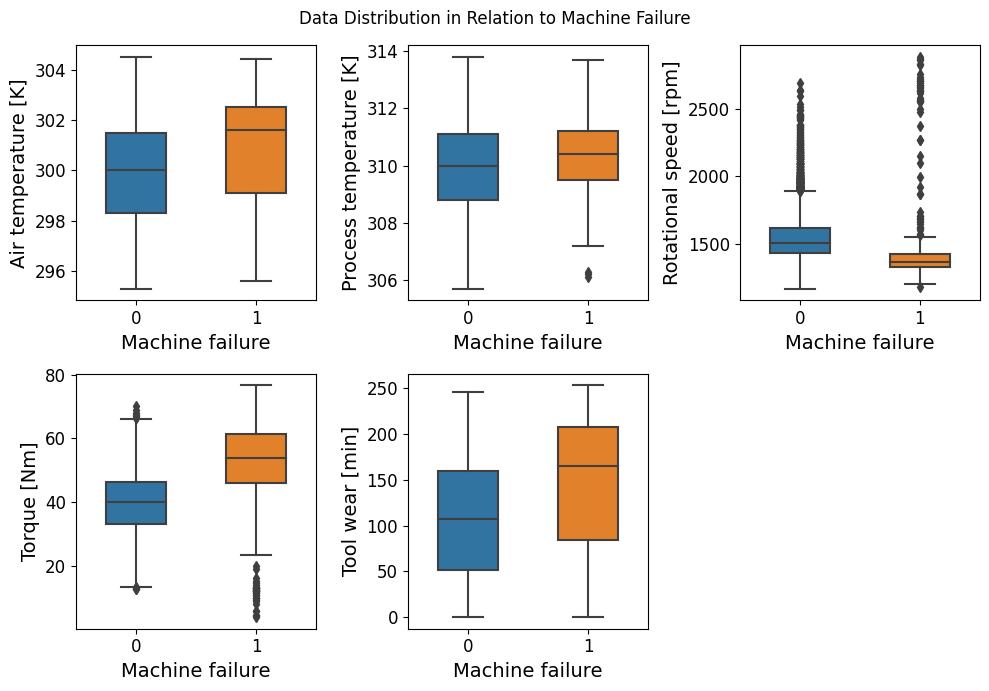

In [ ]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(data, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

<AxesSubplot:>

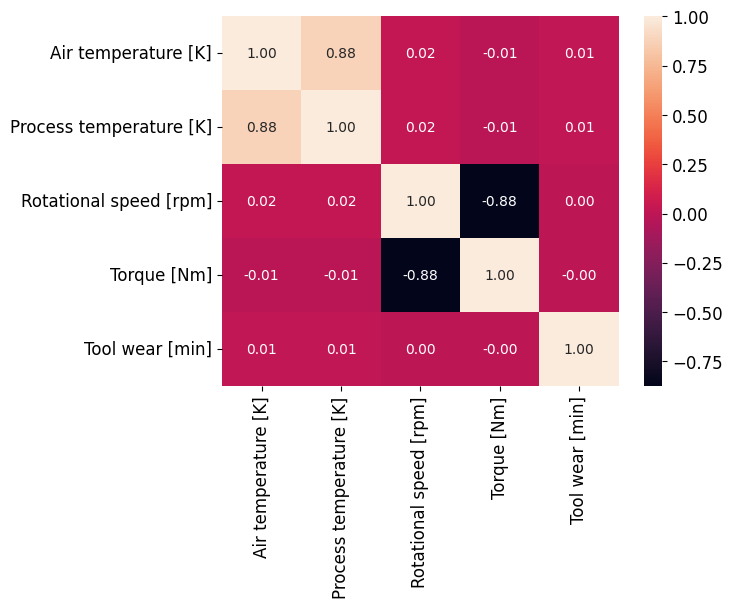

In [ ]:
# plt.figure(figsize = (6,6))
sns.heatmap(data[num_cols].corr(), annot = True, fmt=".2f")  # , square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
# plt.title("Heatmap Analysis")
# plt.show()

In [ ]:
data[num_cols].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

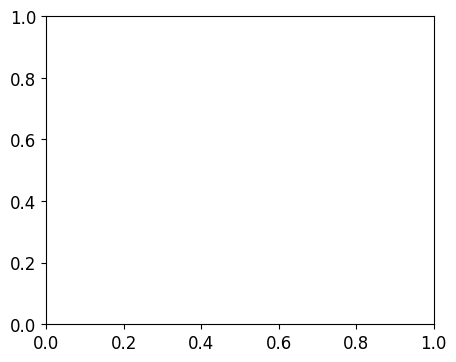

In [ ]:
data.plot.hexbin(x='Air temperature [K]', y='Process temperature [K]', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

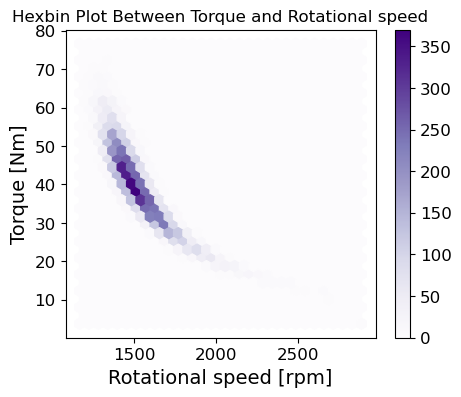

In [ ]:
data.plot.hexbin(x='Rotational speed [rpm]', y='Torque [Nm]', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

Machine failure     0    1    All
Type                             
H                 982   21   1003
L                5765  235   6000
M                2914   83   2997
All              9661  339  10000


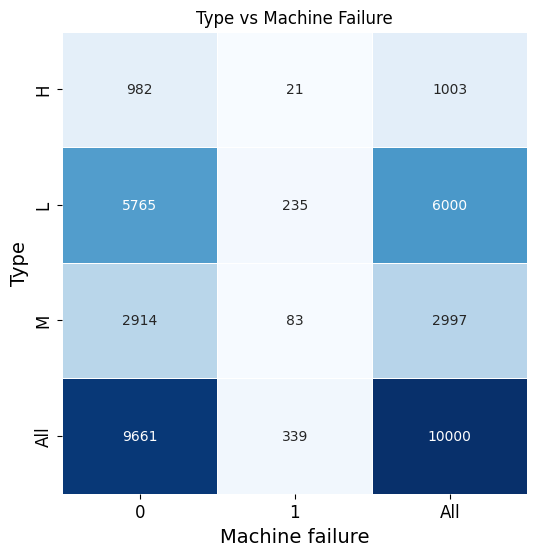

In [ ]:
type_machine_failure = data[['Type', 'Machine failure']].pivot_table(index = 'Type', columns='Machine failure', aggfunc= lambda x: len(x), margins = True)
print(type_machine_failure)
plt.figure(figsize=(6,6))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()